In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [2]:
preproccessed_train_df = pd.read_csv(r'./preprocessedData/train-preprocessed.csv')
preproccessed_test_df = pd.read_csv(r'./preprocessedData/test-preprocessed.csv')

In [3]:
preproccessed_train_df.shape

(276759, 212)

In [4]:
preproccessed_test_df.shape

(30752, 212)

In [5]:
preproccessed_train_df.head()

,Unnamed: 0,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,...,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,TARGET
0,197245,328695,0.001243,0.082876,0.073938,0.057239,0.079177,0.825957,0.197802,0.000000,...,-0.180707,0.191229,0.270126,0.050621,-0.149566,0.217995,0.094645,-0.020663,0.072244,0
1,180379,309048,0.001320,0.021348,0.049017,0.022447,0.226010,0.584549,0.087912,0.105263,...,-0.250685,-0.051708,-0.025450,-0.077051,-0.020953,0.074114,-0.025650,0.013826,0.044659,0
2,42671,149398,0.001158,0.124719,0.062197,0.125701,0.276330,0.765078,0.098901,0.000000,...,-0.092176,0.003207,-0.064521,0.014502,-0.044643,-0.036465,-0.017203,0.011350,0.015536,0
3,128201,248704,0.001050,0.207029,0.184574,0.191919,0.245631,0.972357,0.098901,0.105263,...,0.132030,-0.135607,-0.122080,0.030635,-0.033998,-0.051394,-0.023131,0.018059,0.052966,0
4,268208,410783,0.001127,0.101124,0.132362,0.102132,0.491595,0.803948,0.098901,0.157895,...,-0.156779,-0.484716,-0.113124,0.003474,0.092111,-0.001448,-0.112061,0.012328,0.003772,0


In [6]:
preproccessed_test_df.head()

,Unnamed: 0,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,...,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,TARGET
0,103812,220485,0.000742,0.046067,0.039663,0.047138,0.197042,0.945687,0.098901,0.000000,...,0.107450,-0.099475,-0.146964,0.188104,0.035622,-0.052144,-0.085002,-0.039655,-0.094613,0
1,33350,138637,0.000473,0.197348,0.137206,0.158249,0.276330,0.944147,0.714286,0.052632,...,-0.227368,-0.033126,-0.154565,-0.073216,-0.097993,0.058892,-0.016059,0.013575,0.026204,0
2,118785,237745,0.000550,0.089888,0.072675,0.090909,0.260475,0.818337,0.032967,0.105263,...,0.022146,0.511970,0.058970,0.710577,-0.137946,0.446751,0.154910,0.201776,0.561764,0
3,178204,306505,0.001166,0.131937,0.062004,0.113356,0.254009,0.686000,0.098901,0.000000,...,0.097375,0.142600,0.020987,-0.070686,0.021521,-0.108220,-0.073644,0.002924,0.012265,1
4,114405,232670,0.000935,0.056180,0.046350,0.057239,0.129705,0.880512,0.098901,0.000000,...,-0.005728,-0.017172,0.126068,0.008221,-0.038237,0.020835,-0.017789,-0.022715,-0.063745,0


In [7]:
X_train_df = preproccessed_train_df.drop(columns=["Unnamed: 0", "SK_ID_CURR", "TARGET"])
X_test_df = preproccessed_test_df.drop(columns=["Unnamed: 0", "SK_ID_CURR", "TARGET"])

In [8]:
X_train_df.head()
X_test_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10
0,0.000742,0.046067,0.039663,0.047138,0.197042,0.945687,0.098901,0.000000,0.518318,0.489246,...,-0.317886,0.107450,-0.099475,-0.146964,0.188104,0.035622,-0.052144,-0.085002,-0.039655,-0.094613
1,0.000473,0.197348,0.137206,0.158249,0.276330,0.944147,0.714286,0.052632,0.738676,0.302528,...,0.327519,-0.227368,-0.033126,-0.154565,-0.073216,-0.097993,0.058892,-0.016059,0.013575,0.026204
2,0.000550,0.089888,0.072675,0.090909,0.260475,0.818337,0.032967,0.105263,0.518318,0.766339,...,0.363630,0.022146,0.511970,0.058970,0.710577,-0.137946,0.446751,0.154910,0.201776,0.561764
3,0.001166,0.131937,0.062004,0.113356,0.254009,0.686000,0.098901,0.000000,0.723398,0.745044,...,-0.107483,0.097375,0.142600,0.020987,-0.070686,0.021521,-0.108220,-0.073644,0.002924,0.012265
4,0.000935,0.056180,0.046350,0.057239,0.129705,0.880512,0.098901,0.000000,0.321969,0.301582,...,-0.380793,-0.005728,-0.017172,0.126068,0.008221,-0.038237,0.020835,-0.017789,-0.022715,-0.063745


In [9]:
Y_train_df = preproccessed_train_df[["TARGET"]]
Y_test_df = preproccessed_test_df[["TARGET"]]

In [10]:
Y_train_df.head()
Y_test_df.head()

,TARGET
0,0
1,0
2,0
3,1
4,0


In [11]:
print(Y_train_df.shape)
print(X_train_df.shape)

(276759, 1)
(276759, 209)


In [12]:
lr_model = LogisticRegression()
lr_model.fit(X_train_df, Y_train_df)
y_pred = lr_model.predict_proba(X_test_df)

In [13]:
y_pred_df = y_pred[:, 1]

In [14]:
y_pred_df

array([0.16890159, 0.03718069, 0.03457985, ..., 0.05876237, 0.04136504,
       0.05999474])

In [15]:
[fpr, tpr, thr] = roc_curve(Y_test_df, y_pred_df)

In [44]:
print("LogisticRegression baseline log_loss: %2.3f" % log_loss(Y_test_df, y_pred_df))
print("LogisticRegression baseline roc auc: %0.3f" % auc(fpr, tpr))

LogisticRegression baseline log_loss: 0.246
LogisticRegression baseline roc auc: 0.754


In [55]:
def plot_roc_curve(false_positive, true_positive):
    plt.step(false_positive, true_positive, alpha=0.3, color='blue')
    plt.fill_between(false_positive, true_positive, alpha=0.2, color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC-AUC curve: AUC={0:0.3f}'.format(auc(fpr, tpr)))

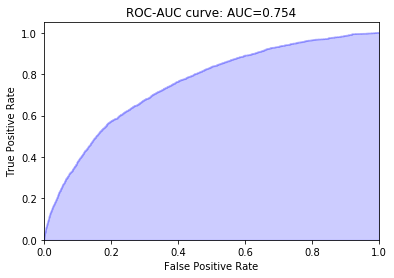

In [56]:
plot_roc_curve(fpr,tpr)